In [10]:
import pandas as pd
import matplotlib.pyplot as plt

Przygotowanie list: years odpowiadającej zakresowi dat danych o urodzeniach; pustej listy pieces, do której będą dołączane dane z poszczególnych lat; listy nazw wykorzystywanych kolumn.

In [5]:
years = range(1880, 2018)
pieces = []
columns = ['name', 'sex', 'births']

W pętli for zmienna year przyjmuje wartości z zakresu listy years, czyli od 1880 do 2017. Dla każdej z tych wartości tworzymy ścieżkę do pliku zawierającego dane z podanego roku. Następnie tworzymy ramkę danych poprzez wczytanie za pomocą funkcji read_csv informacji z pliku. W kolejnym kroku tworzymy nową kolumnę w ramce danych frame, która ma wartość year i zmienną frame dodajemy na koniec listy pieces. Po wykonaniu pętli zostaje utworzona zmienna names, która zawiera ramki danych z listy pieces ustawione jedna, pod drugą za pomocę funkcji concat. 

In [6]:
for year in years:
    path = 'names/yob{}.txt'.format(year)
    frame= pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)

Zmienna total_births jest tabelą przestawną zawierającą sumę urodzeń z podziałem na płeć w poszczególnych latach.

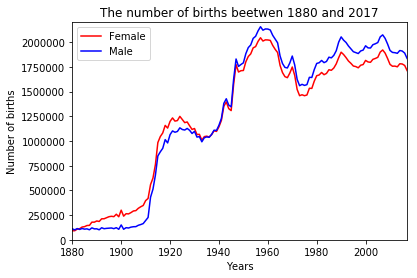

In [22]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
#print(total_births)
plt.plot(total_births['F'], color='red', label='Female')
plt.plot(total_births['M'], color='blue', label='Male')
plt.title('The number of births beetwen 1880 and 2017')
plt.xlabel('Years')
plt.ylabel('Number of births')
plt.axis([1880, 2017, 0, 2200000])
plt.legend()
plt.show()

Na powyższym grafie możemy zauważyć wzrost liczby urodzeń na przestrzeni lat. Dodatkowo zauważamy, że mimo poczatkowej przewagi dziewczyn, w dzisiejszych czasach rodzi się więcej chłopaków. Możemy również odczzytać z wykresu kiedy były tzw. "baby boom" - najlepiej to widać w okolicach roku 1920 i około roku 1955. 

Za pomocą funkcji add_prop dodajemy do danych nową kolumnę, która mówi, jakim procentem wszystkich imion jest dane imie, tzn. normalizujemy dane odnośnie liczby urodzeń. Wartość tę otrzymujemy dzieląc liczbę konkretnych imion przez liczbę wszystkich imion.

In [28]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
print(names.head())
print(names.groupby(['year', 'sex']).prop.sum().head())

        name sex  births  year      prop
0       Mary   F    7065  1880  0.077643
1       Anna   F    2604  1880  0.028618
2       Emma   F    2003  1880  0.022013
3  Elizabeth   F    1939  1880  0.021309
4     Minnie   F    1746  1880  0.019188
year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prop, dtype: float64


Przy użyciu funkcji get_top1000 wybieramy 1000 najpopularniejszych imion, które stanowią większość zbioru.

In [31]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)
#print(top1000)

In [32]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

Zmienna top_births jest tabelą przestawną indeksowaną po latach, w której każdemu imieniu przyporządkowana jest liczba urodzeń. Następnie tworzymy wykres przedstawiający 5 najbardziej popularnych imion żeńskich w 1880 i zmiany liczby dzieci, które te imiona otrzymywały.

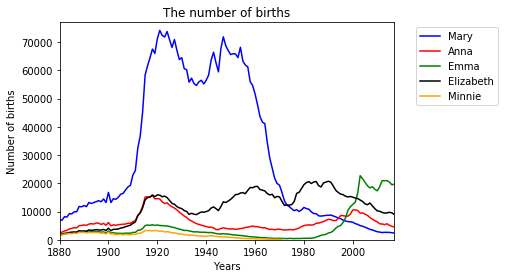

In [49]:
top_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
colors = ['blue', 'red', 'green', 'black', 'orange']
top1880girls_names = ['Mary', 'Anna', 'Emma', 'Elizabeth', 'Minnie']
for i in range(5):
    plt.plot(top_births[top1880girls_names[i]], color=colors[i], label=top1880girls_names[i])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('The number of births')
plt.xlabel('Years')
plt.ylabel('Number of births')
plt.axis([1880, 2017, 0, 77000])
plt.show()

Z wykresu możemy odczytać, że przykładowo pomiędzy 1920 i 1960 imię Mary było bardzo chętnie nadawane dzieciom, ale w ciągu następnych lat imię stawało się coraz mniej popularne. Inną zauważalną własność ma imie Minnie, to znaczy, mimo początkowej popularności (5 miejsce w 1880 roku) w 1970 roku imie to praktycznie nie jest uwzględniane, to znaczy nie należy do top 1000 najczęściej nadawanych imion.

Zmienna table jest tabelą przestawną, która zawiera zsumowany odsetek urodzeń dzieci o imionach z tabeli top1000 z podziałem na płeć.

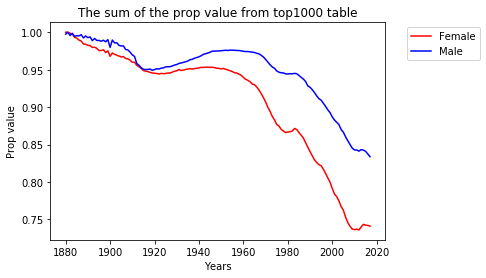

In [53]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
plt.plot(table['F'], color='red', label='Female')
plt.plot(table['M'], color='blue', label='Male')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('The sum of the prop value from top1000 table')
plt.xlabel('Years')
plt.ylabel('Prop value')
plt.show()

Na grafie widzimy, że imiona żeńskie cechują się większą różnorodnością i własność ta z biegiem lat się zmienia. Im bliżej czasów obecnych tym top1000 imion stanowi mniejszy odsetek wśród wszystkich imion nadawanych w danym roku.

In [54]:
df = boys[boys.year == 2017]
print(df.head())

           name sex  births  year      prop
274877     Liam   M   18728  2017  0.010209
274878     Noah   M   18326  2017  0.009990
274879  William   M   14904  2017  0.008124
274880    James   M   14232  2017  0.007758
274881    Logan   M   13974  2017  0.007617


Przy użyciu funkcji get_quantile_count możemy wyznaczyć z podanej grupy liczbę imion, których liczba nadań stanowi 50% wszystkich nadanych imion (50% zbioru).

In [59]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

sex    F   M
year        
1880  38  14
1881  38  14
1882  38  15
1883  39  15
1884  39  16


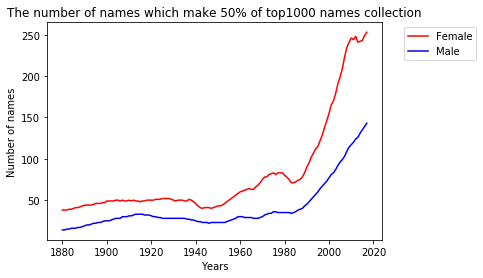

In [60]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
print(diversity.head())
plt.plot(diversity['F'], color='red', label='Female')
plt.plot(diversity['M'], color='blue', label='Male')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('The number of names which make 50% of top1000 names collection')
plt.xlabel('Years')
plt.ylabel('Number of names')
plt.show()

Na przedstawionym wykresie widać zależność omówioną już na wcześniejszym grafie. Widzimy, że z biegiem lat występuje coraz większa różnorodność jesli chodzi o wybór imion i potrzeba większej liczby imion, aby dzieci, które je noszą stanowiły 50% wszystkich urodzeń.

In [61]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

Tworzymy tabelę subtable, która się składa z informacji z lat: 1880, 1930, 1980 i 2015. Tabela ta przedstawia znormalizowaną wartość, która informuje, jak często dana litera występuje na końcu imion. 

In [65]:
subtable = table.reindex(columns=[1880, 1930, 1980, 2015], level='year')
#print(subtable.head())
#print(subtable.sum())
letter_prop = subtable / subtable.sum()
print(letter_prop.head())

sex                 F                                       M            \
year             1880      1930      1980      2015      1880      1930   
last_letter                                                               
a            0.345587  0.256130  0.378276  0.370882  0.007023  0.003253   
b                 NaN  0.000018  0.000048  0.000335  0.004607  0.002753   
c                 NaN  0.000012  0.000243  0.000704  0.003159  0.001629   
d            0.006693  0.010779  0.001219  0.001828  0.083057  0.166909   
e            0.366841  0.271311  0.187097  0.183635  0.122119  0.120161   

sex                              
year             1980      2015  
last_letter                      
a            0.023779  0.015160  
b            0.005688  0.015476  
c            0.017045  0.012099  
d            0.072593  0.022891  
e            0.063035  0.067224  


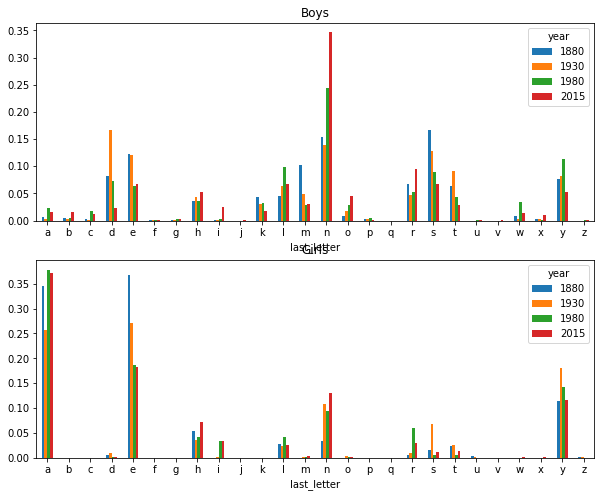

In [67]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Boys')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Girls')

Z wykresu słupkowego możemy odczytać, że w 2015 roku 4 najczęściej występującymi literami w przypadku imion męskich są: e, n, s oraz y. W związku z tym sprawdzimy, jak zmieniał się udział tych liter na przestrzeni lat.

In [69]:
full_letter_prop = table / table.sum()
popular_letters = full_letter_prop.loc[['e', 'n', 's', 'y'], 'M'].T
print(popular_letters.head())

last_letter         e         n         s         y
year                                               
1880         0.122119  0.153216  0.167009  0.075762
1881         0.123145  0.153212  0.162483  0.077455
1882         0.128538  0.149561  0.160433  0.077538
1883         0.126076  0.151653  0.158105  0.079148
1884         0.127890  0.149927  0.154751  0.080408


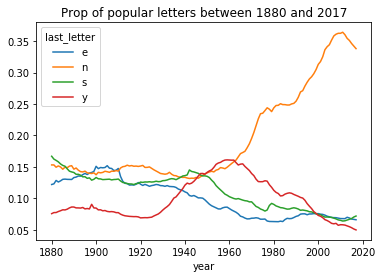

In [71]:
popular_letters.plot(title='Prop of popular letters between 1880 and 2017')